# Assignment

In [175]:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

from IPython.display import Image

Problem 1. 

1. Load the moons dataset: from sklearn.datasets import make_moons
- Create 200 samples with noise=0.1
- Split into training (70%) and testing (30%) sets


2. Train two classifiers:
- LogisticRegression
- DecisionTreeClassifier

3. Calculate accuracy for both models on the test set
- Plot the decision boundaries for both classifiers


* Bonus

Implement one technique to improve the performance of either model

In [176]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples=200, noise=0.1, random_state=7)

In [177]:
X = moons[0]
y = moons[1]

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=7)

In [ ]:
log_reg = LogisticRegression(random_state=7)
log_reg.fit(X_train, y_train)

In [ ]:
dec_tree = DecisionTreeClassifier(random_state=7)
dec_tree.fit(X_train, y_train)

In [181]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
    cmap_bold  = ["#FF0000", "#0000FF"]

    plt.contourf(xx, yy, Z, cmap=cmap_light)

    for i, cls in enumerate(np.unique(y)):
        plt.scatter(X[y == cls, 0], X[y == cls, 1],
                    c=cmap_bold[i], label=f"Class {cls}",
                    edgecolor="k", s=30)

    plt.title(title)
    plt.legend()
    plt.show()

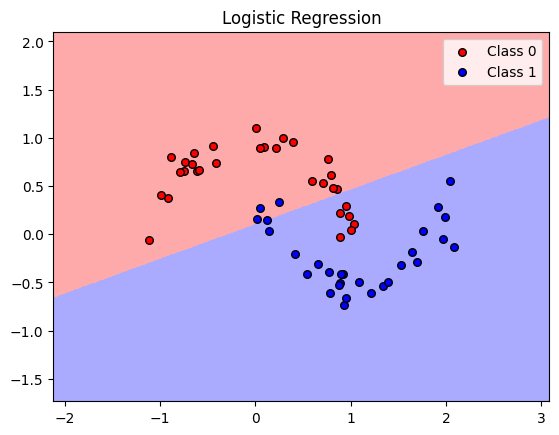

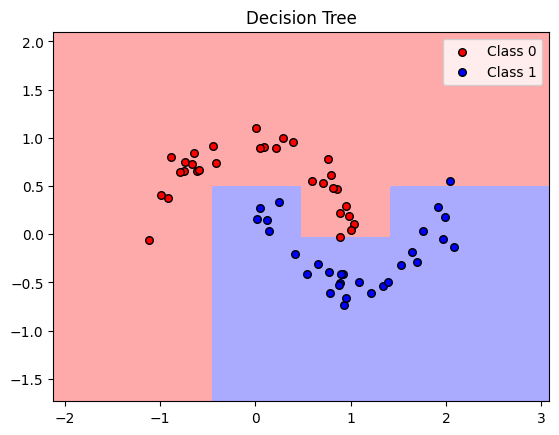

In [182]:
plot_decision_boundary(log_reg, X_test, y_test, title="Logistic Regression")
plot_decision_boundary(dec_tree, X_test, y_test, title="Decision Tree")

In [183]:
from sklearn.metrics import accuracy_score

train_acc_lr = accuracy_score(y_train, log_reg.predict(X_train))
test_acc_lr  = accuracy_score(y_test, log_reg.predict(X_test))

train_acc_tree = accuracy_score(y_train, dec_tree.predict(X_train))
test_acc_tree  = accuracy_score(y_test, dec_tree.predict(X_test))

In [184]:
print("Logistic Regression:")
print("Train Accuracy: ", train_acc_lr)
print("Test Accuracy: ", test_acc_lr)

Logistic Regression:
Train Accuracy:  0.8571428571428571
Test Accuracy:  0.8333333333333334


In [185]:
print("Decision Tree:")
print("Train Accuracy: ", train_acc_tree)
print("Test Accuracy: ", test_acc_tree)

Decision Tree:
Train Accuracy:  1.0
Test Accuracy:  0.9833333333333333


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_log_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("log_reg", LogisticRegression(C=10, random_state=7, max_iter=5000))
])

poly_log_reg.fit(X_train, y_train)

In [187]:
train_acc_poly = accuracy_score(y_train, poly_log_reg.predict(X_train))
test_acc_poly = accuracy_score(y_test, poly_log_reg.predict(X_test))

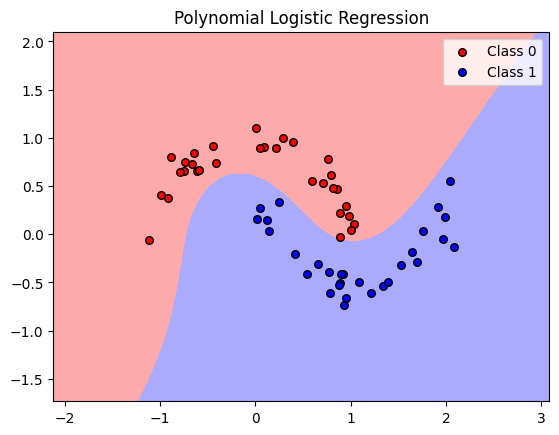

In [188]:
plot_decision_boundary(poly_log_reg, X_test, y_test,
                       title="Polynomial Logistic Regression")

In [189]:
print("Polynomial Logistic Regression:")
print("Train Accuracy: ", train_acc_poly)
print("Test Accuracy: ", test_acc_poly)

Polynomial Logistic Regression:
Train Accuracy:  1.0
Test Accuracy:  1.0


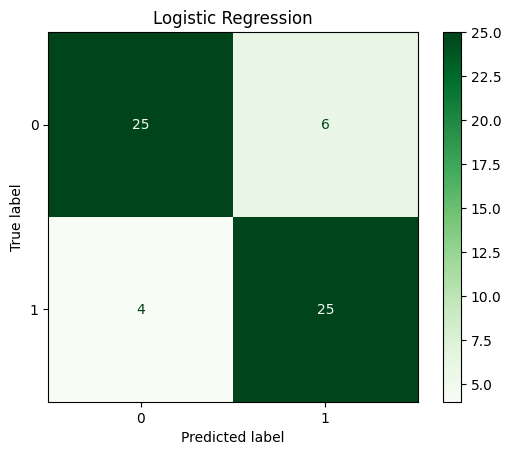

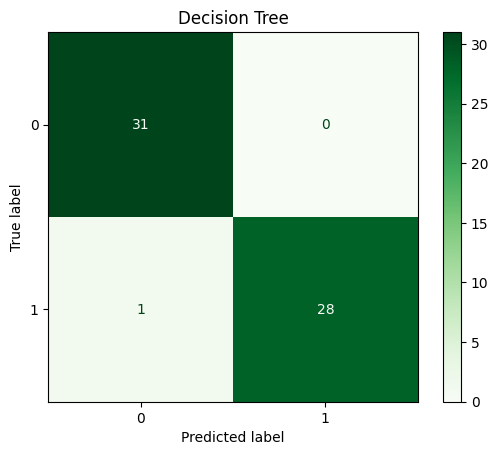

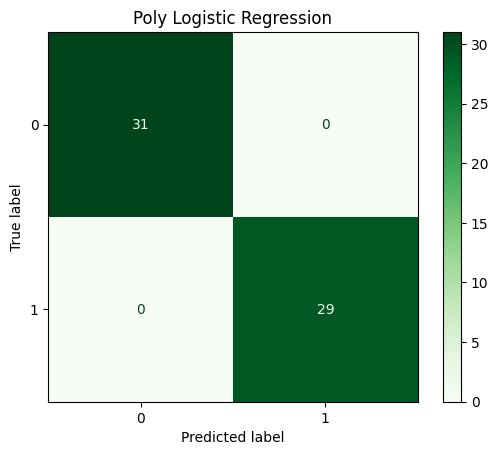

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models_dict = {
    "Logistic Regression": log_reg,
    "Decision Tree": dec_tree,
    "Poly Logistic Regression": poly_log_reg
}

for name, model in models_dict.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=np.unique(y))
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f"{name}")
    plt.show()

Problem 1. Train logistic regression model on the wine classification dataset. 
- First, split the dataset into train and test. What is the accuracy of the obtained model? Confusion matrix?

In [191]:
from sklearn.datasets import load_wine
data = load_wine()

In [192]:
X = data.data
y = data.target

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [ ]:
log_reg = LogisticRegression(max_iter=3000, random_state=7)
log_reg.fit(X_train, y_train)

In [195]:
train_acc = accuracy_score(y_train, log_reg.predict(X_train))
test_acc  = accuracy_score(y_test, log_reg.predict(X_test))

In [196]:
print("Train Accuracy: ", train_acc)
print("Test Accuracy: ", test_acc)

Train Accuracy:  1.0
Test Accuracy:  0.9444444444444444


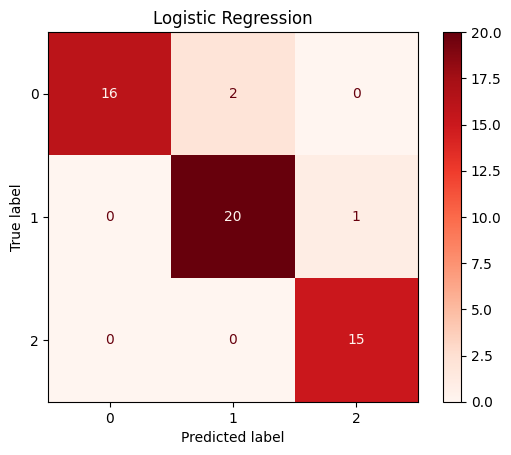

In [199]:
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Reds)
plt.title("Logistic Regression")
plt.show()

Problem 2 (theoretical). Don't chatgpt, use your own brain and wording, thank you. You can google if you need to, though.
- Imagine we are dealing with a binary classification task and we have a class distribution of 90%/10%, meaning a very unbalanced set of samples. 
    - Out of all the metrics we learned, what do you think the best classification metric for this task would be? Precision-recall? Accuracy? F1-score? ROC AUC? Something else?
    - Share your thoughts on the topic, and express yourself on the *accuracy* metric here. Would it be beneficial, not at all?

In this case, Accuracy is the worst option, since if a model always chooses first class, then the accuracy will be 90%, but in fact, the model itself would be terrible.
ROC AUC would also be a misleading option. If a model makes a lot of mistakes classifying first class, the impact on the curve might be weak, so it will look fine.
Precision-Recall is useful in cases with unbalanced datasets, since it shows how many of the True Positive predictions where right and how many of all TPs where classified correctly.
Out of all the metrics, F1-score is the best. It combines both precision and recall, and with a significant drop of either of them the F1-score also drops.